### 0. Importar librerías

In [1]:
import pandas as pd
import numpy as np

# Se define la semilla para que cuando se vuelva a ejecutar el split train-test
# los datos que contiene cada conjunto sean los mismos y para que la inicialización
# del modelo creado sea la misma.
semilla = 1234

---

# 1. Cargar el dataset

In [2]:
# Ruta del fichero
path = 'datos/datos_filtrados.csv'

# Cargar el dataset
datos = pd.read_csv(path)

# Al ser un dataset pequeño se muestra completo
datos

,AF365,AF450,35 deg,42 deg,Grupo
0,2.320158,1.229614,13.01,19.39,0
1,1.529274,0.616514,8.18,24.78,0
2,1.908257,0.955847,7.75,16.90,0
3,1.590625,1.018495,4.10,16.30,0
4,1.617071,1.242961,5.76,21.05,0
...,...,...,...,...,...
115,3.034884,2.051768,4.55,8.50,2
116,4.093525,3.037288,3.97,5.35,2
117,4.730000,3.040000,7.04,14.44,2
118,3.200000,2.360000,6.70,10.57,2


In [3]:
# Contar el número de instancias de cada grupo
datos['Grupo'].value_counts()

1    61
0    46
2    13
Name: Grupo, dtype: int64

## Preparar conjuntos de entrenamiento (80%) y test (20%)

In [4]:
# Se separa la variable a predecir (Grupo)
X = datos.drop('Grupo', axis=1)
y = datos['Grupo']

In [5]:
# Importar librería de scikit-learn para separar los datos
from sklearn.model_selection import train_test_split

# Separar datos en conjunto de entrenamiento (80%) y test (20%) de manera estratificada
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=semilla)

In [6]:
# Visualizar la dimensión de los datos separados
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (96, 4)
Training Labels Shape: (96,)
Testing Features Shape: (24, 4)
Testing Labels Shape: (24,)


In [7]:
# Distribución de los grupos en el conjunto de entrenamiento
y_train.value_counts()

1    49
0    37
2    10
Name: Grupo, dtype: int64

In [8]:
# Valores normalizados
y_train.value_counts(normalize=True)

1    0.510417
0    0.385417
2    0.104167
Name: Grupo, dtype: float64

In [9]:
# Distribución de los grupos en el conjunto de test
y_test.value_counts()

1    12
0     9
2     3
Name: Grupo, dtype: int64

In [10]:
# Valores normalizados
y_test.value_counts(normalize=True)

1    0.500
0    0.375
2    0.125
Name: Grupo, dtype: float64

### Visualizar distribución de cada conjunto (entrenamiento y test)

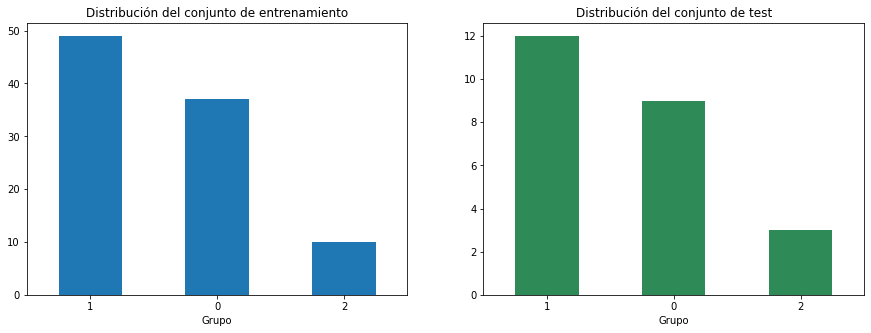

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,5))

#fig.suptitle("Distribución de los grupos en los conjuntos de entrenamiento y test")

# Representación del conjunto de entrenamiento
plt.subplot(121)
y_train.value_counts().plot(kind='bar')
plt.title('Distribución del conjunto de entrenamiento')
plt.xlabel('Grupo')
plt.xticks(rotation=0)

# Representación del conjunto de test
plt.subplot(122)
y_test.value_counts().plot(kind='bar', color='seagreen')
plt.title('Distribución del conjunto de test')
plt.xlabel('Grupo')
plt.xticks(rotation=0)

plt.show()

### Escalar los datos

Información sobre esto: https://datascience.stackexchange.com/questions/78489/feature-scaling-for-mlp-neural-network-sklearn

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# El escalado se ajusta con la media y la desviación estandar del conjunto de entrenamiento
scaler.fit(X_train)

StandardScaler()

In [13]:
# Se aplica la transformación a los datos
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

---

# 2. Crear el modelo

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import multiprocessing

# Definición del modelo
modelo = MLPClassifier(random_state=semilla)

# Definición de parámetros de búsqueda
parametros = {'hidden_layer_sizes': [(8,8), (16,8), (32,16)],
              'activation'        : ['logistic','tanh','relu'],
              'solver'            : ['sgd','adam'],
              'alpha'             : 10.0 ** -np.arange(1, 10),
              'learning_rate'     : ['constant'],
              'learning_rate_init': [0.001],
              'max_iter'          : [1000,1500,2000],
              'verbose'           : [False],
              'early_stopping'    : [True,False],
              'n_iter_no_change'  : [10]}

# Definición de los folds estratificados
folds = StratifiedKFold(n_splits=8, shuffle=True, random_state=semilla)

# Búsqueda de parámetros
grid = GridSearchCV(
    estimator  = modelo,
    param_grid = parametros,
    scoring    = 'accuracy',
    n_jobs     = multiprocessing.cpu_count() - 1,
    cv         = folds,
    verbose    = 0,
    return_train_score = True
    )

# Entrenamiento
grid.fit(X_train_norm, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=8, random_state=1234, shuffle=True),
             estimator=MLPClassifier(random_state=1234), n_jobs=7,
             param_grid={'activation': ['logistic', 'tanh', 'relu'],
                         'alpha': array([1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07, 1.e-08,
       1.e-09]),
                         'early_stopping': [True, False],
                         'hidden_layer_sizes': [(8, 8), (16, 8), (32, 16)],
                         'learning_rate': ['constant'],
                         'learning_rate_init': [0.001],
                         'max_iter': [1000, 1500, 2000],
                         'n_iter_no_change': [10], 'solver': ['sgd', 'adam'],
                         'verbose': [False]},
             return_train_score=True, scoring='accuracy')

In [15]:
# Visualización de los resultados de la búsqueda
df_resultados = pd.DataFrame(grid.cv_results_)
df_resultados = df_resultados.sort_values(by=['rank_test_score'])
df_resultados[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']].head()

,params,rank_test_score,mean_test_score,std_test_score
502,"{'activation': 'tanh', 'alpha': 1e-05, 'early_...",1,0.833333,0.117851
462,"{'activation': 'tanh', 'alpha': 0.0001, 'early...",1,0.833333,0.117851
646,"{'activation': 'tanh', 'alpha': 1e-09, 'early_...",1,0.833333,0.117851
394,"{'activation': 'tanh', 'alpha': 0.01, 'early_s...",1,0.833333,0.117851
500,"{'activation': 'tanh', 'alpha': 1e-05, 'early_...",1,0.833333,0.117851


In [16]:
# Se muestran los mejores parámetros
print('Mejores parámetros: ', grid.best_params_)

Mejores parámetros:  {'activation': 'tanh', 'alpha': 0.1, 'early_stopping': False, 'hidden_layer_sizes': (32, 16), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 1000, 'n_iter_no_change': 10, 'solver': 'sgd', 'verbose': False}


In [17]:
# Se visualiza la exactitud (accuracy) del entrenamiento para compararlo con el que se obtenga en la evaluación
print(grid.best_score_)

0.8333333333333333


In [18]:
# Se toma el modelo que ha obtenido el mejor resultado
modelo_rn = grid.best_estimator_

### Visualización del entrenamiento

A continuación, se van a visualizar una serie de parámetros del resultado del entrenamiento.

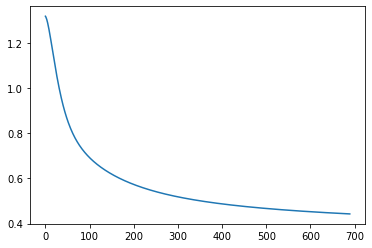

In [19]:
# Evolución de la pérdida (loss) en cada iteración del entrenamiento
plt.plot(modelo_rn.loss_curve_)
plt.show()

In [20]:
# Número de iteraciones en las que ha finalizado el entrenamiento
# Si se han alcanzado 'n_iter_no_change' sin que varíe la pérdida un valor mayor de 'tol'
modelo_rn.n_iter_

690

In [21]:
# Obtención de la matriz de los pesos
weights = modelo_rn.coefs_

La variable _weights_ contiene una lista de arrays con todos los pesos de la red neuronal. Esta lista tiene 3 elementos:

- ___weights[0]___: lista de 4 arrays de longitud 32. El elemento _weights[0][0]_ es un array de tamaño 32 correspondiente a los pesos de entrada a la capa oculta 1 de la variable _AF365_. De manera análoga, _weights[0][1]_ se corresponde a los pesos de la variable _AF450_, _weights[0][2]_ a los pesos de la variable _35 deg_ y _weights[0][3]_ a los pesos de la variable _42 deg_.
- ___weights[1]___: lista de 32 arrays de longitud 16 correspondientes a los pesos de entrada a la capa oculta 2 de cada una de las neuronas de la capa oculta 1.
- ___weights[2]___: lista de 16 arrays de longitud 3 correspondientes a los pesos de entrada a la capa de salida de cada una de las neuronas de la capa oculta 2.

Estos pesos se pueden visualizar en las celdas siguientes:

In [22]:
# Pesos de entrada a la capa oculta 1
print("--------------------------------------------------------------------------")
print("Pesos de entrada a la capa oculta 1 de la variable AF365:")
print("--------------------------------------------------------------------------")
print(weights[0][0])
print("\n")
print("--------------------------------------------------------------------------")
print("Pesos de entrada a la capa oculta 1 de la variable AF450:")
print("--------------------------------------------------------------------------")
print(weights[0][1])
print("\n")
print("--------------------------------------------------------------------------")
print("Pesos de entrada a la capa oculta 1 de la variable 35 deg:")
print("--------------------------------------------------------------------------")
print(weights[0][2])
print("\n")
print("--------------------------------------------------------------------------")
print("Pesos de entrada a la capa oculta 1 de la variable 42 deg:")
print("--------------------------------------------------------------------------")
print(weights[0][3])

--------------------------------------------------------------------------
Pesos de entrada a la capa oculta 1 de la variable AF365:
--------------------------------------------------------------------------
[-0.27289189  0.0817475   0.01442929  0.1750549   0.12838667 -0.07386082
 -0.20585071  0.29785135  0.26310921  0.30284277 -0.09295085 -0.16399638
  0.18533125  0.16914131 -0.10677528  0.05237521 -0.12474937 -0.40119067
  0.18590536  0.34877566 -0.11189354  0.08685324 -0.37705224 -0.11222746
  0.41163546  0.17760871 -0.1890666   0.20541195 -0.11593207  0.08766819
  0.39102177 -0.12839009]


--------------------------------------------------------------------------
Pesos de entrada a la capa oculta 1 de la variable AF450:
--------------------------------------------------------------------------
[ 0.1800954  -0.32590719  0.22989853  0.08699651 -0.32506173  0.43489453
 -0.09307614  0.38772192 -0.44454737 -0.24806849 -0.30836125 -0.0482107
  0.12566014  0.04727859 -0.36797456  0.077673

In [23]:
# Pesos de entrada a la capa oculta 2
print(weights[1])

[[-0.25595309  0.13734121  0.35188756  0.29090087  0.3456477   0.24438147
  -0.00658934 -0.03389478  0.21803673  0.32143763  0.08136357 -0.10850359
  -0.18606934  0.24016938 -0.2163052   0.17631323]
 [-0.16091885  0.22717283  0.21031156  0.13508846  0.14064902  0.09879298
   0.19578658  0.20531105 -0.0711001  -0.36458896 -0.10427619  0.16863881
  -0.18405325 -0.1293073   0.14628587 -0.20875229]
 [-0.24706588  0.14113094 -0.20726708 -0.04937664 -0.00190405 -0.38600149
   0.21487916  0.24100409  0.29012407  0.2834264   0.14347436  0.25674623
   0.27567188  0.12779072 -0.43274141 -0.08854417]
 [-0.12063375 -0.10944269 -0.31955763  0.17294763  0.01585423  0.1066215
   0.08413809 -0.09344262 -0.03246499 -0.05229963 -0.03667732  0.34992779
  -0.05518177 -0.33366273  0.29815466  0.25675259]
 [-0.07971247  0.10307707 -0.13294325 -0.22956367 -0.15940805 -0.01207549
  -0.26546619  0.14653863  0.24356875  0.29899108 -0.1130963  -0.11163392
  -0.12818799  0.25177042  0.33858531 -0.02983508]
 [-0.4

In [24]:
# Pesos de entrada a la capa de salida
print(weights[2])

[[ 0.11458697  0.36154629 -0.68895528]
 [-0.12681867 -0.21528441 -0.26086234]
 [-0.3145334  -0.21201718  0.29173124]
 [-0.50804423 -0.40195089 -0.16616978]
 [ 0.21650946 -0.25860921 -0.00193136]
 [ 0.43506325 -0.44929217 -0.20533533]
 [ 0.21295601  0.44630665 -0.20018865]
 [ 0.57746741 -0.00432726  0.1793752 ]
 [ 0.42791286  0.61648723 -0.53611803]
 [-0.46617847 -0.24931578 -0.58414306]
 [ 0.14852107  0.33384747  0.6049037 ]
 [ 0.03293727  0.18772507 -0.50396415]
 [-0.63907912  0.37138236 -0.24502989]
 [ 0.22861048  0.50273203  0.03320646]
 [ 0.77479207 -0.28058492 -0.46403403]
 [ 0.25341015 -0.12222055  0.04475931]]


In [25]:
# Obtención de la matriz de los sesgos (bias)
bias = modelo_rn.intercepts_

La variable _bias_ contiene una lista de arrays con todos los sesgos o _bias_ de cada una de las neuronas de la red. Esta lista tiene 3 elementos:

- ___bias[0]___: array de longitud 32 correspondiente a los sesgos de las neuronas de la capa oculta 1.
- ___bias[1]___: array de longitud 16 correspondiente a los sesgos de las neuronas de la capa oculta 2.
- ___bias[2]___: array de longitud 3 correspondiente a los sesgos de las neuronas de la capa de salida.

Estos sesgos se pueden visualizar en la celda siguiente:

In [26]:
# Visualización de los sesgos (bias) de la red neuronal
print("--------------------------------------------------------------------------")
print("Sesgos de las neuronas de la capa oculta 1")
print("--------------------------------------------------------------------------")
print(bias[0])
print("\n")
print("--------------------------------------------------------------------------")
print("Sesgos de las neuronas de la capa oculta 2")
print("--------------------------------------------------------------------------")
print(bias[1])
print("\n")
print("--------------------------------------------------------------------------")
print("Sesgos de las neuronas de la capa de salida")
print("--------------------------------------------------------------------------")
print(bias[2])

--------------------------------------------------------------------------
Sesgos de las neuronas de la capa oculta 1
--------------------------------------------------------------------------
[-0.41413274 -0.38940823  0.02272226  0.04008685  0.31058181 -0.28824859
 -0.27993085 -0.44210753  0.42029243 -0.2634877  -0.12573868  0.11622634
 -0.35165611  0.38433776  0.39571563  0.1555285  -0.18682765  0.00115547
  0.15445841 -0.46615805 -0.00677073 -0.16355215  0.49883043  0.03882313
 -0.2254147  -0.36374361  0.27056332  0.33070776  0.28461791  0.36582201
  0.05041448 -0.06265722]


--------------------------------------------------------------------------
Sesgos de las neuronas de la capa oculta 2
--------------------------------------------------------------------------
[ 0.07648703  0.23466612 -0.38481114 -0.3586019   0.00469205  0.24586089
 -0.12532385  0.04356266 -0.14249306 -0.19059593 -0.34894764  0.33007593
  0.12693226 -0.21244704  0.18523738 -0.03459558]


-----------------------

In [27]:
# Características de la red neuronal
print("Número de capas de la red neuronal:",                            modelo_rn.n_layers_)
print("Número de características (features) de la red neuronal:",       modelo_rn.n_features_in_)
print("Número de neuronas en la capa de salida:",                       modelo_rn.n_outputs_)
print("Función de activación de la capa de salida de la red neuronal:", modelo_rn.out_activation_)

Número de capas de la red neuronal: 4
Número de características (features) de la red neuronal: 4
Número de neuronas en la capa de salida: 3
Función de activación de la capa de salida de la red neuronal: softmax


In [28]:
# Hiperparámetros del modelo seleccionado
modelo_rn.get_params(deep=True)

{'activation': 'tanh',
 'alpha': 0.1,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (32, 16),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 1000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 1234,
 'shuffle': True,
 'solver': 'sgd',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

---

# 3. Evaluar el modelo

In [29]:
# Se lleva a cabo la predicción para evaluar el modelo
y_pred = modelo_rn.predict(X_test_norm)

In [30]:
# Visualización de las predicciones
print(y_pred)

[1 1 1 0 1 0 0 2 1 1 1 0 2 1 0 1 0 0 2 0 0 1 1 1]


## Matriz de confusión

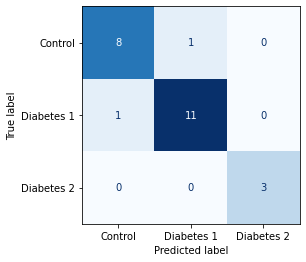

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

cm = confusion_matrix(y_test, y_pred)
# Filas: valores reales
# Columnas: predicción

clases = ['Control', 'Diabetes 1', 'Diabetes 2']

# Visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clases)

disp.plot(cmap='Blues', colorbar=False)
plt.show()

## Classification report

In [32]:
clases = ['Control', 'Diabetes 1', 'Diabetes 2']

print(classification_report(y_test,
                            y_pred,
                            target_names=clases,
                            digits=4,
                            zero_division=0))

# El parámetro zero_division no muestra warnings cuando se vaya a realizar una división por 0 al calcular alguna métrica

              precision    recall  f1-score   support

     Control     0.8889    0.8889    0.8889         9
  Diabetes 1     0.9167    0.9167    0.9167        12
  Diabetes 2     1.0000    1.0000    1.0000         3

    accuracy                         0.9167        24
   macro avg     0.9352    0.9352    0.9352        24
weighted avg     0.9167    0.9167    0.9167        24



Se calcula la __especificidad__ a partir de la clase _multilabel_confusion_matrix_. Se van a obtener también el resto de métricas con las obtenidas en el _classification report_ para comprobar que son correctas.

Código basado en la documentación de scikit-learn: https://scikit-learn.org/stable/modules/model_evaluation.html#multilabel-confusion-matrix

In [33]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

# Se obtiene la matriz de confusión de cada clase
cm_multi = multilabel_confusion_matrix(y_test, y_pred)

# Se obtienen los valores de TN, TP, FN y FP de cada clase
tn = cm_multi[:, 0, 0]
tp = cm_multi[:, 1, 1]
fn = cm_multi[:, 1, 0]
fp = cm_multi[:, 0, 1]

# Se calculan las métricas (array de dimensión 3 con la métrica para cada clase)
accuracy    = accuracy_score(y_test, y_pred)
precision   = tp / (tp + fp)
recall      = tp / (tp + fn)
specificity = tn / (tn + fp)
f1          = (2 * precision * recall) / (precision + recall)

# Visualizar la exactitud del modelo
print("----------------------")
print("Exactitud: \t{:.4f}".format(accuracy))
print("----------------------")
print("")

# Visualizar la métrica precision para cada clase y la global (macro avg)
print("----------------------")
print("      Precisión       ")
print("----------------------")
print("Control: \t{:.4f}".format(precision[0]))
print("Diabetes 1: \t{:.4f}".format(precision[1]))
print("Diabetes 2: \t{:.4f}".format(precision[2]))
print("MACRO AVG: \t{:.4f}".format(precision.mean()))
print("")

# Visualizar la sensibilidad para cada clase y la global (macro avg)
print("----------------------")
print("     Sensibilidad     ")
print("----------------------")
print("Control: \t{:.4f}".format(recall[0]))
print("Diabetes 1: \t{:.4f}".format(recall[1]))
print("Diabetes 2: \t{:.4f}".format(recall[2]))
print("MACRO AVG: \t{:.4f}".format(recall.mean()))
print("")

# Visualizar la especificidad para cada clase y la global (macro avg)
print("----------------------")
print("    Especificidad     ")
print("----------------------")
print("Control: \t{:.4f}".format(specificity[0]))
print("Diabetes 1: \t{:.4f}".format(specificity[1]))
print("Diabetes 2: \t{:.4f}".format(specificity[2]))
print("MACRO AVG: \t{:.4f}".format(specificity.mean()))
print("")

# Visualizar la mátrica F1 para cada clase y la global (macro avg)
print("----------------------")
print("       F1-score       ")
print("----------------------")
print("Control: \t{:.4f}".format(f1[0]))
print("Diabetes 1: \t{:.4f}".format(f1[1]))
print("Diabetes 2: \t{:.4f}".format(f1[2]))
print("MACRO AVG: \t{:.4f}".format(f1.mean()))
print("")

----------------------
Exactitud: 	0.9167
----------------------

----------------------
      Precisión       
----------------------
Control: 	0.8889
Diabetes 1: 	0.9167
Diabetes 2: 	1.0000
MACRO AVG: 	0.9352

----------------------
     Sensibilidad     
----------------------
Control: 	0.8889
Diabetes 1: 	0.9167
Diabetes 2: 	1.0000
MACRO AVG: 	0.9352

----------------------
    Especificidad     
----------------------
Control: 	0.9333
Diabetes 1: 	0.9167
Diabetes 2: 	1.0000
MACRO AVG: 	0.9500

----------------------
       F1-score       
----------------------
Control: 	0.8889
Diabetes 1: 	0.9167
Diabetes 2: 	1.0000
MACRO AVG: 	0.9352

